# Project: Car Price Prediction

In [1]:
import pandas as pd

## Initial data cleaning with raw data

In [2]:
df = pd.read_csv('auto24_cars_raw.csv')

In [3]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(df.head())

Dataset has 15612 rows and 12 columns

Column names:
['url', 'brand', 'first_reg', 'type', 'body_type', 'engine', 'fuel', 'mileage', 'drive_type', 'gearbox', 'color', 'price']

First 5 rows:
                                      url                   brand  first_reg  \
0  https://www.auto24.ee/soidukid/4098580     Toyota Land Cruiser     1992.0   
1  https://www.auto24.ee/soidukid/4095518              Opel Corsa     2008.0   
2  https://www.auto24.ee/soidukid/4241916               Saab 9000     1992.0   
3  https://www.auto24.ee/soidukid/4215960  Fiat Albea Comfort LPG     2008.0   
4  https://www.auto24.ee/soidukid/4239545              Ford Focus     2007.0   

        type   body_type     engine                            fuel   mileage  \
0    maastur  universaal  4.2 123kW                          diisel  464000.0   
1  sõiduauto    luukpära   1.2 59kW                         bensiin  180000.0   
2  sõiduauto    luukpära  2.3 110kW                         bensiin  305698.0   
3  s

In [4]:
# Before removing duplicates
print(f"Original rows: {len(df)}")

# Remove duplicates
df = df.drop_duplicates(subset=['url'])

# After removing duplicates
print(f"Rows after removing duplicates: {len(df)}")

Original rows: 15612
Rows after removing duplicates: 14767


In [5]:
# Before removing
print(f"Original rows: {len(df)}")

# Remove rows with any missing values
df = df.dropna()

# After removing
print(f"Rows after removing missing values: {len(df)}")

Original rows: 14767
Rows after removing missing values: 13826


In [6]:
#Translate
df['type'] = df['type'].replace('maastur', 'suv')
df['type'] = df['type'].replace('sõiduauto', 'passenger')


In [7]:
# Split by whitespace and take the first word
df['body_type'] = df['body_type'].str.split().str[0]

In [8]:
df['body_type'] = df['body_type'].replace('sedaan', 'sedan')
df['body_type'] = df['body_type'].replace('universaal', 'touring')
df['body_type'] = df['body_type'].replace('luukpära', 'hatchback')
df['body_type'] = df['body_type'].replace('mahtuniversaal', 'minivan')
df['body_type'] = df['body_type'].replace('kabriolett', 'cabriolet')
df['body_type'] = df['body_type'].replace('pikap', 'pickup')
df['body_type'] = df['body_type'].replace('kupee', 'coupe')
df['body_type'] = df['body_type'].replace('lahtine', 'open')
df['body_type'] = df['body_type'].replace('limusiin', 'limousine')

In [9]:
df['fuel'] = df['fuel'].replace('bensiin + gaas (LPG/vedelgaas)', 'bensiin + gaas')
df['fuel'] = df['fuel'].replace('bensiin + gaas (CNG/surugaas)', 'bensiin + gaas')
df['fuel'] = df['fuel'].replace('hübriid (bensiin / elekter)', 'hübriid')
df['fuel'] = df['fuel'].replace('hübriid (diisel / elekter)', 'hübriid')
df['fuel'] = df['fuel'].replace('gaas (CNG/surugaas)', 'gaas')
df['fuel'] = df['fuel'].replace('gaas (LPG/vedelgaas)', 'gaas')
df['fuel'] = df['fuel'].replace('pistikhübriid (diisel / elekter)', 'pistikhübriid')
df['fuel'] = df['fuel'].replace('pistikhübriid (bensiin / elekter)', 'pistikhübriid')

In [10]:
df['fuel'] = df['fuel'].replace('diisel', 'diesel')
df['fuel'] = df['fuel'].replace('bensiin', 'petrol')
df['fuel'] = df['fuel'].replace('bensiin + gaas', 'petrol + gas')
df['fuel'] = df['fuel'].replace('hübriid', 'hybrid')
df['fuel'] = df['fuel'].replace('elekter', 'electric')
df['fuel'] = df['fuel'].replace('gaas', 'gas')
df['fuel'] = df['fuel'].replace('pistikhübriid', 'plug-in hybrid')
df['fuel'] = df['fuel'].replace('vesinik', 'hydrogen')
df['fuel'] = df['fuel'].replace('etanool', 'ethanol')

In [11]:
df['drive_type'] = df['drive_type'].replace('nelikvedu', 'four-wheel drive')
df['drive_type'] = df['drive_type'].replace('esivedu', 'front-wheel drive')
df['drive_type'] = df['drive_type'].replace('tagavedu', 'rear-wheel drive')

In [12]:
df['gearbox'] = df['gearbox'].str.split().str[0]

In [13]:
# Remove rows where gearbox equals '(Konstantne'
df = df[df['gearbox'] != '(konstantne']
df = df[df['gearbox'] != '(Konstantne']

In [14]:
df['gearbox'] = df['gearbox'].replace({
    'automaat': 'automatic',
    'manuaal': 'manual',
    'poolautomaat': 'semi-automatic'
})

In [15]:
df['color'] = df['color'].str.split().str[0]

In [16]:
# Create translation dictionary
color_translation = {
    'punane': 'red',
    'must': 'black',
    'valge': 'white',
    'helesinine': 'light blue',
    'hõbedane': 'silver',
    'roheline': 'green',
    'heleroheline': 'light green',
    'hall': 'gray',
    'tumehall': 'dark gray',
    'beež': 'beige',
    'sinine': 'blue',
    'lilla': 'purple',
    'pruun': 'brown',
    'tumepunane': 'dark red',
    'oranž': 'orange',
    'helehall': 'light gray',
    'tumesinine': 'dark blue',
    'tumeroheline': 'dark green',
    'helebeež': 'light beige',
    'kollane': 'yellow',
    'kuldne': 'gold',
    'helepruun': 'light brown',
    'tumepruun': 'dark brown',
    'tumeoranž': 'dark orange',
    'helekollane': 'light yellow',
    'tumelilla': 'dark purple',
    'tumebeež': 'dark beige',
    'roosa': 'pink',
    'Gold': 'gold',
    'helepunane': 'light red',
    'Bentayga': 'Bentayga',  # Model name, not a color
    'Rose': 'rose'
}

# Replace values
df['color'] = df['color'].replace(color_translation)

In [17]:
df = df[df['color'] != 'Bentayga']


In [18]:
# Count spaces in brand column
space_count = df['brand'].str.count(' ')

# Create model column
df['model'] = None

# Only split where there's exactly 1 space (2 words)
mask = space_count == 1

# Split and assign for rows with exactly 1 space
df.loc[mask, 'model'] = df.loc[mask, 'brand'].str.split(' ').str[1]
df.loc[mask, 'brand'] = df.loc[mask, 'brand'].str.split(' ').str[0]

In [19]:
# Get the column index of 'brand'
brand_index = df.columns.get_loc('brand')

# Reorder columns - insert model right after brand
cols = df.columns.tolist()
cols.remove('model')
cols.insert(brand_index + 1, 'model')
df = df[cols]

In [20]:
df['brand'].unique()

array(['Toyota Land Cruiser', 'Opel', 'Saab', ..., 'Ferrari SF90 Spider',
       'Lamborghini Aventador Ultimae 1/350',
       'BMW 750 Ld M-Packet XDrive'], shape=(5734,), dtype=object)

In [21]:
df = df[df['brand'] != 'Land']
df = df[df['brand'] != 'MCC']

In [22]:
# Create mask for rows containing 'Land Rover'
land_rover_mask = df['brand'].str.contains('Land Rover', na=False)

# For Land Rover rows, extract everything after 'Land Rover'
df.loc[land_rover_mask, 'model'] = df.loc[land_rover_mask, 'brand'].str.replace('Land Rover', '', n=1).str.strip()

# Set brand to 'Land Rover' for those rows
df.loc[land_rover_mask, 'brand'] = 'Land Rover'

In [23]:
land_rover_mask = df['brand'].str.contains('Alfa Romeo', na=False)

df.loc[land_rover_mask, 'model'] = df.loc[land_rover_mask, 'brand'].str.replace('Alfa Romeo', '', n=1).str.strip()

df.loc[land_rover_mask, 'brand'] = 'Alfa Romeo'

In [24]:
land_rover_mask = df['brand'].str.contains('Aston Martin', na=False)

df.loc[land_rover_mask, 'model'] = df.loc[land_rover_mask, 'brand'].str.replace('Aston Martin', '', n=1).str.strip()

df.loc[land_rover_mask, 'brand'] = 'Aston Martin'

In [25]:
# Create mask for rows with at least 2 spaces
mask = df['brand'].str.count(' ') >= 2

# For these rows, split on first space only
# First word goes to brand, everything else to model
df.loc[mask, 'model'] = df.loc[mask, 'brand'].str.split(' ', n=1).str[1]
df.loc[mask, 'brand'] = df.loc[mask, 'brand'].str.split(' ', n=1).str[0]

In [26]:
# Count occurrences of each brand
brand_counts = df['brand'].value_counts()

# Get brands that appear more than once
brands_to_keep = brand_counts[brand_counts > 10].index

# Keep only rows with brands that appear more than once
df = df[df['brand'].isin(brands_to_keep)]

In [27]:
# Create mask for models with more than 2 words (at least 2 spaces)
mask = df['model'].str.count(' ') >= 2

# Keep only first 2 words for those rows
df.loc[mask, 'model'] = df.loc[mask, 'model'].str.split(' ', n=2).str[:2].str.join(' ')

In [28]:
df['model'] = df['model'].apply(
    lambda x: x if pd.isna(x) or 'Land Cruiser' in str(x) else str(x).split()[0]
)

In [29]:
model_counts = df['model'].value_counts()

models_to_keep = model_counts[model_counts > 10].index

df = df[df['model'].isin(models_to_keep)]

In [30]:
df['engine_size'] = df['engine'].str.extract(r'^([\d.]+)')[0]
df['power'] = df['engine'].str.extract(r'(\d+kW)')[0]
df['power'] = df['power'].str.replace('kW', '')
df.drop('engine', axis=1, inplace=True)

In [31]:
df.head()

,url,brand,model,first_reg,type,body_type,fuel,mileage,drive_type,gearbox,color,price,engine_size,power
0,https://www.auto24.ee/soidukid/4098580,Toyota,Land Cruiser,1992.0,suv,touring,diesel,464000.0,four-wheel drive,manual,red,19.0,4.2,123
1,https://www.auto24.ee/soidukid/4095518,Opel,Corsa,2008.0,passenger,hatchback,petrol,180000.0,front-wheel drive,automatic,black,300.0,1.2,59
4,https://www.auto24.ee/soidukid/4239545,Ford,Focus,2007.0,passenger,touring,diesel,287000.0,front-wheel drive,manual,silver,399.0,1.8,85
5,https://www.auto24.ee/soidukid/4197828,Honda,Accord,2008.0,passenger,minivan,petrol,402000.0,front-wheel drive,manual,silver,399.0,2.0,114
7,https://www.auto24.ee/soidukid/4204313,Renault,Scenic,2001.0,passenger,hatchback,petrol,222000.0,front-wheel drive,manual,light green,399.0,1.4,70


In [32]:
# df.loc[df['model'].str.startswith('Outlander', na=False), 'model'] = 'Outlander'
# df.loc[df['model'].str.startswith('Pacifica', na=False), 'model'] = 'Pacifica'
# df.loc[df['model'].str.startswith('Passat', na=False), 'model'] = 'Passat'
# df.loc[df['model'].str.startswith('e-tron', na=False), 'model'] = 'e-tron'
# df.loc[df['model'].str.startswith('Z3', na=False), 'model'] = 'Z3'
# df.loc[df['model'].str.startswith('Z4', na=False), 'model'] = 'Z4'
# df.loc[df['model'].str.startswith('ZR-V', na=False), 'model'] = 'ZR-V'
# df.loc[df['model'].str.startswith('Zafira', na=False), 'model'] = 'Zafira'
# df.loc[df['model'].str.startswith('Yaris', na=False), 'model'] = 'Yaris'
# df.loc[df['model'].str.startswith('Zoe', na=False), 'model'] = 'Zoe'
# df.loc[df['model'].str.startswith('Yeti', na=False), 'model'] = 'Yeti'
# df.loc[df['model'].str.startswith('bZ4X', na=False), 'model'] = 'bZ4X'
# df.loc[df['model'].str.startswith('i10', na=False), 'model'] = 'i10'
# df.loc[df['model'].str.startswith('i20', na=False), 'model'] = 'i20'
# df.loc[df['model'].str.startswith('i3', na=False), 'model'] = 'i3'
# df.loc[df['model'].str.startswith('i30', na=False), 'model'] = 'i30'
# df.loc[df['model'].str.startswith('i40', na=False), 'model'] = 'i40'
# df.loc[df['model'].str.startswith('ix35', na=False), 'model'] = 'ix35'
# df.loc[df['model'].str.startswith('iX3', na=False), 'model'] = 'iX3'
# df.loc[df['model'].str.startswith('iX2', na=False), 'model'] = 'iX2'
# df.loc[df['model'].str.startswith('iX', na=False), 'model'] = 'iX'
# df.loc[df['model'].str.startswith('i8', na=False), 'model'] = 'i8'
# df.loc[df['model'].str.startswith('i7', na=False), 'model'] = 'i7'
# df.loc[df['model'].str.startswith('i5', na=False), 'model'] = 'i5'
# df.loc[df['model'].str.startswith('i4', na=False), 'model'] = 'i4'
# df.loc[df['model'].str.startswith('cee\'d', na=False), 'model'] = 'ceed'
# df.loc[df['model'].str.startswith('XC90', na=False), 'model'] = 'XC90'
# df.loc[df['model'].str.startswith('XC70', na=False), 'model'] = 'XC70'
# df.loc[df['model'].str.startswith('XC60', na=False), 'model'] = 'XC60'
# df.loc[df['model'].str.startswith('XC40', na=False), 'model'] = 'XC40'
# df.loc[df['model'].str.startswith('XCeed', na=False), 'model'] = 'XCeed'
# df.loc[df['model'].str.startswith('XV', na=False), 'model'] = 'XV'
# df.loc[df['model'].str.startswith('XJ', na=False), 'model'] = 'XJ'
# df.loc[df['model'].str.startswith('XKR', na=False), 'model'] = 'XKR'
# df.loc[df['model'].str.startswith('XM', na=False), 'model'] = 'XM'
# df.loc[df['model'].str.startswith('Xsara', na=False), 'model'] = 'Xsara'
# df.loc[df['model'].str.startswith('X1', na=False), 'model'] = 'X1'
# df.loc[df['model'].str.startswith('X2', na=False), 'model'] = 'X2'
# df.loc[df['model'].str.startswith('X3', na=False), 'model'] = 'X3'
# df.loc[df['model'].str.startswith('X4', na=False), 'model'] = 'X4'
# df.loc[df['model'].str.startswith('X5', na=False), 'model'] = 'X5'
# df.loc[df['model'].str.startswith('X6', na=False), 'model'] = 'X6'
# df.loc[df['model'].str.startswith('X7', na=False), 'model'] = 'X7'
# df.loc[df['model'].str.startswith('XF', na=False), 'model'] = 'XF'

## Exploratory Data Analysis (EDA)

In [33]:
print(f"Dataset shape at this point: {df.shape}")

Dataset shape at this point: (11934, 14)


In [34]:
import numpy as np
import re

print("\n📊 --- Basic Info ---")
df.info()
print("\nMissing values per column:")
print(df.isna().sum())


📊 --- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 11934 entries, 0 to 14864
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          11934 non-null  object 
 1   brand        11934 non-null  object 
 2   model        11934 non-null  object 
 3   first_reg    11934 non-null  float64
 4   type         11934 non-null  object 
 5   body_type    11934 non-null  object 
 6   fuel         11934 non-null  object 
 7   mileage      11934 non-null  float64
 8   drive_type   11934 non-null  object 
 9   gearbox      11934 non-null  object 
 10  color        11934 non-null  object 
 11  price        11934 non-null  float64
 12  engine_size  11897 non-null  object 
 13  power        11882 non-null  object 
dtypes: float64(3), object(11)
memory usage: 1.4+ MB

Missing values per column:
url             0
brand           0
model           0
first_reg       0
type            0
body_type       0
fuel         

In [35]:
# how many unique values for each column?
df.nunique()

url            11934
brand             41
model            247
first_reg         49
type               2
body_type          9
fuel               7
mileage         5432
drive_type         3
gearbox            3
color             30
price           1894
engine_size      198
power            295
dtype: int64

In [36]:
# statistics for numerical columns in our dataset
df. describe()

,first_reg,mileage,price
count,11934.000000,1.193400e+04,11934.000000
mean,2016.156863,1.643173e+05,23728.448718
std,6.407791,1.185975e+05,25266.553329
min,1966.000000,1.000000e+00,19.000000
25%,2012.000000,7.435275e+04,8400.000000
50%,2017.000000,1.540000e+05,17290.000000
75%,2021.000000,2.410000e+05,29999.000000
max,2025.000000,3.700000e+06,410708.000000


In [37]:
# Shape before droppin any rows:
no_of_rows_before_dropping = df.shape[0]

In [38]:
# Drop rows containing null
df = df.dropna(subset=['engine_size', 'power']).reset_index(drop=True)
missing_after = df[['engine_size', 'power']].isna().sum()
print("Shape after dropping:", {df.shape})

Shape after dropping: {(11845, 14)}


In [39]:
# Dropped 89 rows. Currently (at least for now), we are keeping the dataset as it is and not replacing/imputing values
no_of_rows_before_dropping - df.shape[0]

89

In [40]:
# --- 1. Drop unnecessary column (url) ---
df = df.drop(columns=['url'])
print("After dropping url:", df.shape)

After dropping url: (11845, 13)


In [41]:
# --- 2. Remove unrealistic prices ---
df = df[df['price'] >= 300]   # Drop cars below 300 €
print("Remaining cars:", len(df))

Remaining cars: 11843


In [42]:
# --- 3. Identify categorical and numeric columns ---
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nCategorical columns:", cat_cols)
print("Numeric columns:", num_cols)


Categorical columns: ['brand', 'model', 'type', 'body_type', 'fuel', 'drive_type', 'gearbox', 'color', 'engine_size', 'power']
Numeric columns: ['first_reg', 'mileage', 'price']


In [43]:
print("\nUnique counts per column:")
print(df.nunique())


Unique counts per column:
brand            41
model           247
first_reg        48
type              2
body_type         9
fuel              7
mileage        5390
drive_type        3
gearbox           3
color            30
price          1884
engine_size     197
power           295
dtype: int64


In [44]:
# Convert engine_size and power to numeric
for col in ['engine_size', 'power']:
    df[col] = (
        df[col]
        .astype(str)                     # ensure string format
        .str.replace(',', '.', regex=False)  # convert commas to dots if present
        .str.extract(r'(\d+\.?\d*)')[0]      # extract numeric part
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float, NaN if invalid

# Check conversion results
print(df[['engine_size', 'power']].dtypes)
print(df[['engine_size', 'power']].head(10))


engine_size    float64
power            int64
dtype: object
    engine_size  power
1           1.2     59
2           1.8     85
3           2.0    114
4           1.4     70
5           1.4     66
6           2.0    136
7           1.6     75
8           2.4    108
9           1.8    103
10          1.6     91


In [45]:
# --- 1. Handle 'model' grouping by average price ---
group_size = 5
model_price = df.groupby('model')['price'].mean().sort_values(ascending=False)
model_groups = {model: i // group_size for i, model in enumerate(model_price.index)}
df['model_group'] = df['model'].map(model_groups)
df = df.drop(columns=['model'])

# --- 2. Handle rare colors (group uncommon colors as 'other') ---
color_counts = df['color'].value_counts()
rare_colors = color_counts[color_counts < 50].index
df['color'] = df['color'].replace(rare_colors, 'other')


In [46]:
model_groups

{'Bentayga': 0,
 'Continental': 0,
 'G': 0,
 '911': 0,
 '718': 0,
 'Taycan': 1,
 'X7': 1,
 'GT': 1,
 'Corvette': 1,
 'M5': 1,
 'GLS': 2,
 'RS': 2,
 'Q8': 2,
 '1500': 2,
 'iX': 2,
 'Cayenne': 3,
 'GLE': 3,
 'Defender': 3,
 'Macan': 3,
 'Panamera': 3,
 'i4': 4,
 'V': 4,
 'Tayron': 4,
 'Highlander': 4,
 'Q4': 4,
 'EV6': 5,
 'SQ7': 5,
 'e-tron': 5,
 'GLC': 5,
 'S': 5,
 'F-150': 6,
 'NX': 6,
 'EQC': 6,
 'bZ4X': 6,
 'X4': 6,
 'Amarok': 7,
 'X6': 7,
 'Enyaq': 7,
 'X5': 7,
 'GLB': 7,
 'XC90': 8,
 'Q7': 8,
 'Model': 8,
 'Pacifica': 8,
 'Touareg': 8,
 'S90': 9,
 'Ioniq': 9,
 'Mustang': 9,
 'Kodiaq': 9,
 'Formentor': 9,
 '408': 10,
 'Q5': 10,
 '740': 10,
 'Escalade': 10,
 'Eclipse': 10,
 'RX': 11,
 'UX': 11,
 'Ranger': 11,
 'XC60': 11,
 'Multivan': 11,
 '750': 12,
 'XC40': 12,
 'Land Cruiser': 12,
 'V90': 12,
 'ID.4': 12,
 'Arteon': 13,
 'Hilux': 13,
 'Range': 13,
 'Wrangler': 13,
 'Sorento': 13,
 'Tourneo': 14,
 'ProAce': 14,
 'Traveller': 14,
 '420': 14,
 'X3': 14,
 'Santa': 15,
 'A7': 15,
 '52

In [47]:
# let's make first_reg from float to int
df['first_reg'] = df['first_reg'].astype(int)


In [48]:
from datetime import date

# right now we have first_reg as first_registration date, but for our analysis, we would need the age of the car
df['age'] = date.today().year - df['first_reg']

In [49]:
print(f"Rows before outlier removal: {len(df)}")

price_lower = df['price'].quantile(0.01)
price_upper = df['price'].quantile(0.99)
df = df[(df['price'] >= price_lower) & (df['price'] <= price_upper)]

mileage_lower = df['mileage'].quantile(0.01)
mileage_upper = df['mileage'].quantile(0.99)
df = df[(df['mileage'] >= mileage_lower) & (df['mileage'] <= mileage_upper)]

print(f"Rows after outlier removal: {len(df)}")

Rows before outlier removal: 11843
Rows after outlier removal: 11403


In [50]:
df['power_per_engine'] = df['power'] / df['engine_size']
# Replace inf values (resulting from division by zero) with NaN
df['power_per_engine'] = df['power_per_engine'].replace([np.inf, -np.inf], np.nan)
# Fill any NaN values (including those from inf replacement) with the mean of the column
df['power_per_engine'] = df['power_per_engine'].fillna(df['power_per_engine'].mean())

df['age_mileage_interaction'] = df['age'] * df['mileage']

df['mileage_per_year'] = df['mileage'] / df['age']
# Replace inf values (resulting from division by zero, e.g., age=0) with NaN
df['mileage_per_year'] = df['mileage_per_year'].replace([np.inf, -np.inf], np.nan)
# Fill any NaN values (including those from inf replacement) with the mean of the column
df['mileage_per_year'] = df['mileage_per_year'].fillna(df['mileage_per_year'].mean())

print("New features 'power_per_engine', 'age_mileage_interaction', and 'mileage_per_year' created.")
print(df[['power_per_engine', 'age_mileage_interaction', 'mileage_per_year']].head())


New features 'power_per_engine', 'age_mileage_interaction', and 'mileage_per_year' created.
     power_per_engine  age_mileage_interaction  mileage_per_year
111         46.818182                6764000.0      18736.842105
112         34.000000                9800000.0      12500.000000
113         43.125000                3629500.0      12558.823529
114         49.000000                7366525.0      11786.440000
115         39.166667                2574500.0       7131.578947


In [51]:
# --- 3. Identify categorical and numeric columns ---
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nCategorical columns:", cat_cols)
print("Numeric columns:", num_cols)


Categorical columns: ['brand', 'type', 'body_type', 'fuel', 'drive_type', 'gearbox', 'color']
Numeric columns: ['first_reg', 'mileage', 'price', 'engine_size', 'power', 'model_group', 'age', 'power_per_engine', 'age_mileage_interaction', 'mileage_per_year']


In [52]:
# ADD PLOTS FOR DISTRIBUTIONS BELOW THAT

first_reg
Skew value: -1.09


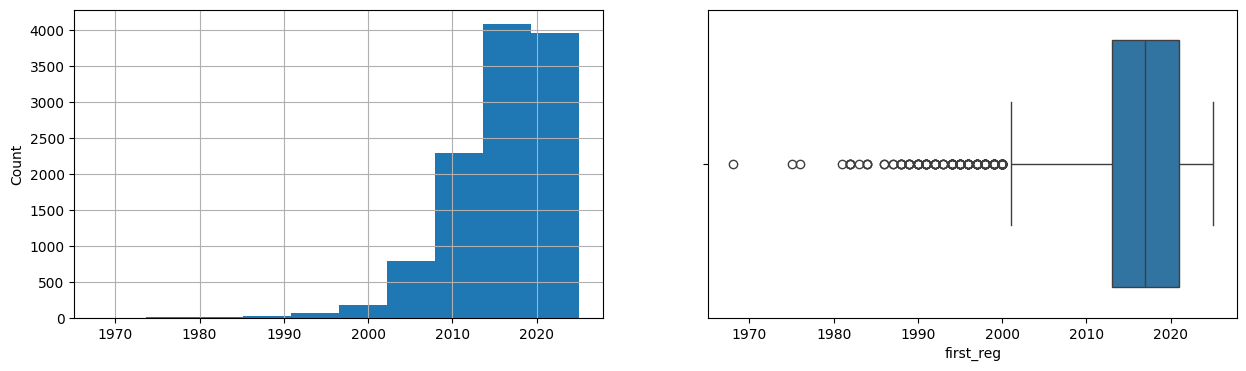

mileage
Skew value: 0.32


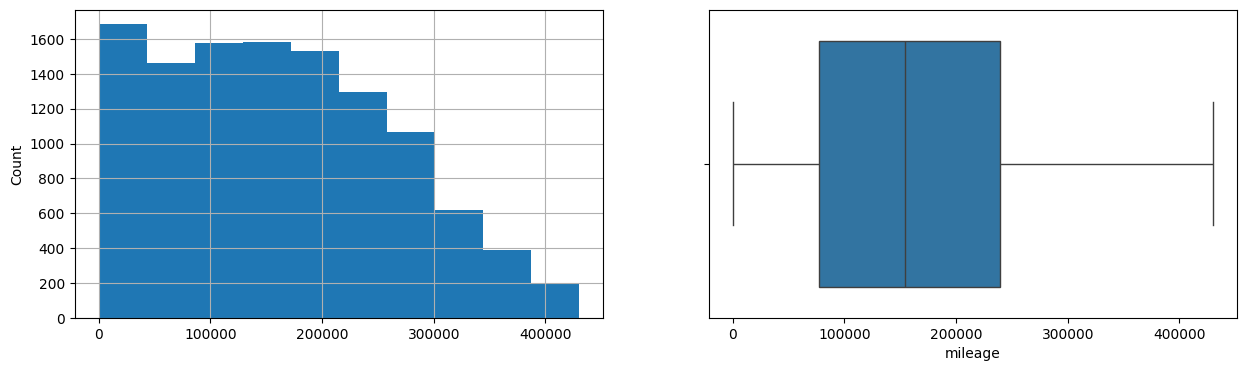

price
Skew value: 1.63


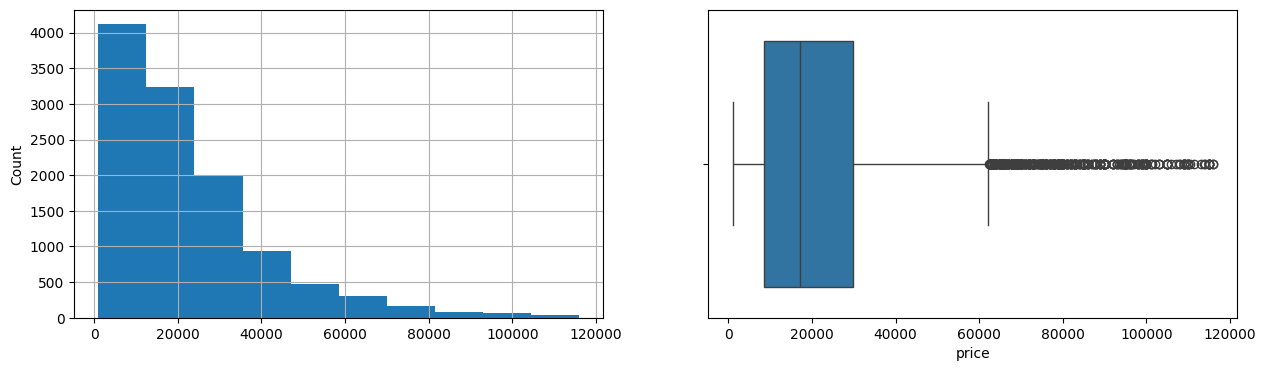

engine_size
Skew value: 11.03


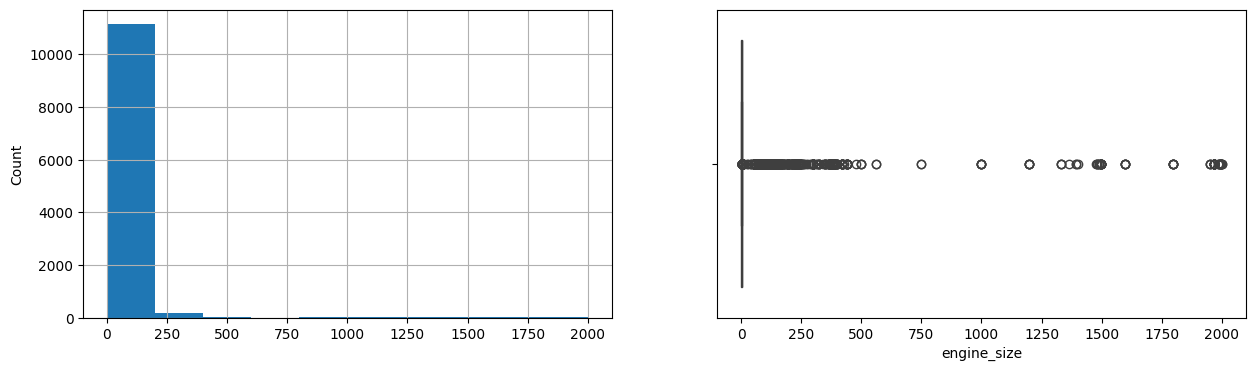

power
Skew value: 1.8


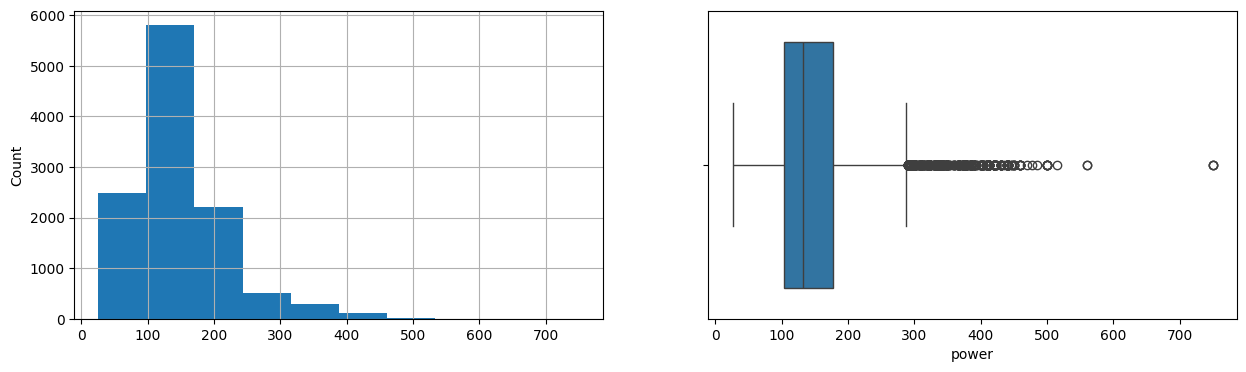

model_group
Skew value: 0.03


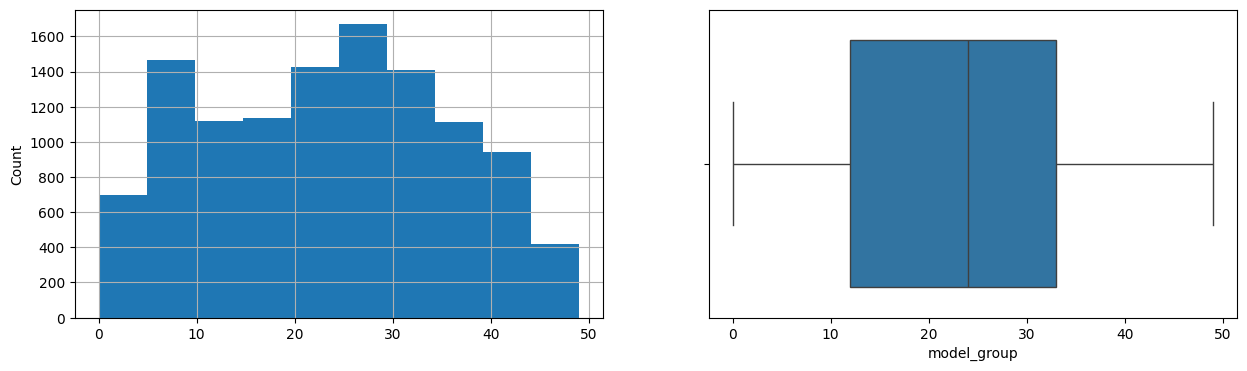

age
Skew value: 1.09


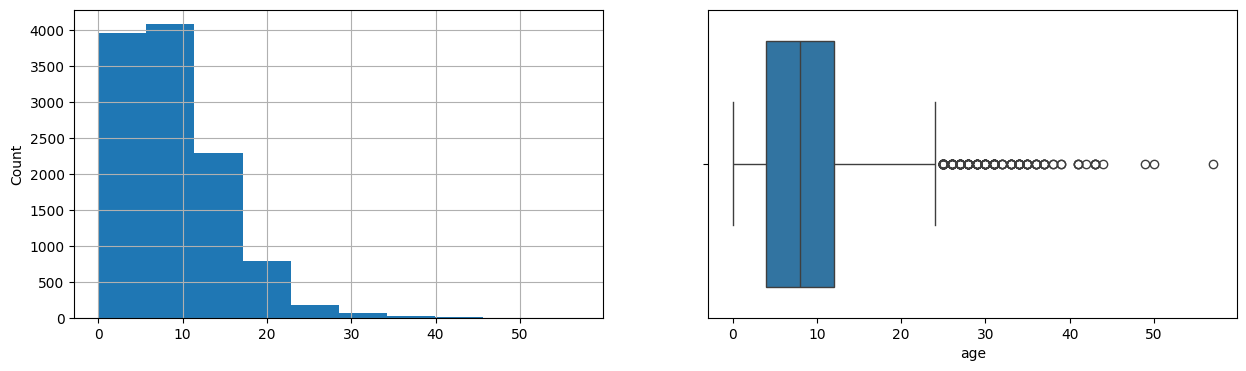

power_per_engine
Skew value: -0.07


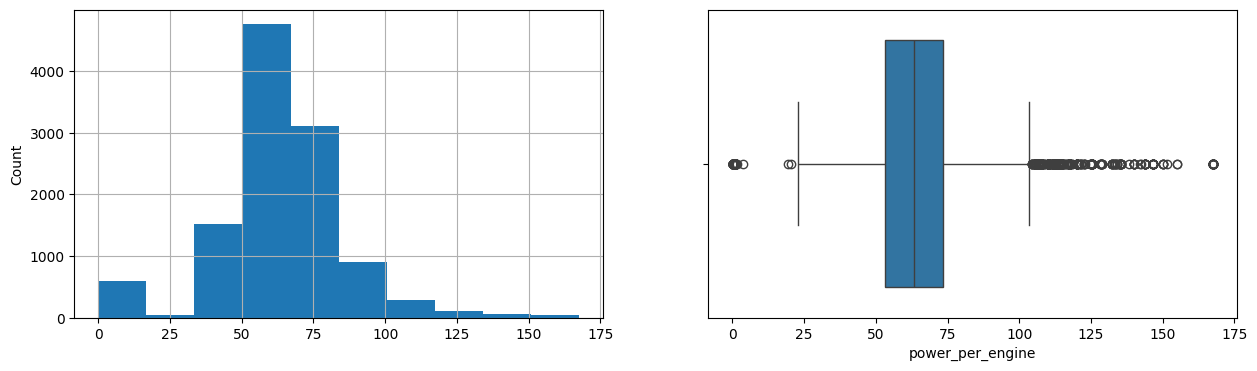

age_mileage_interaction
Skew value: 1.5


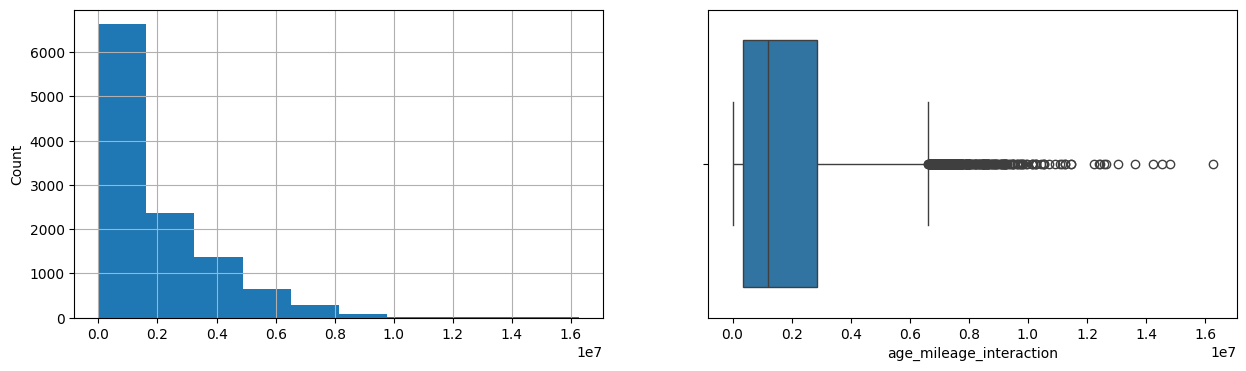

mileage_per_year
Skew value: 1.43


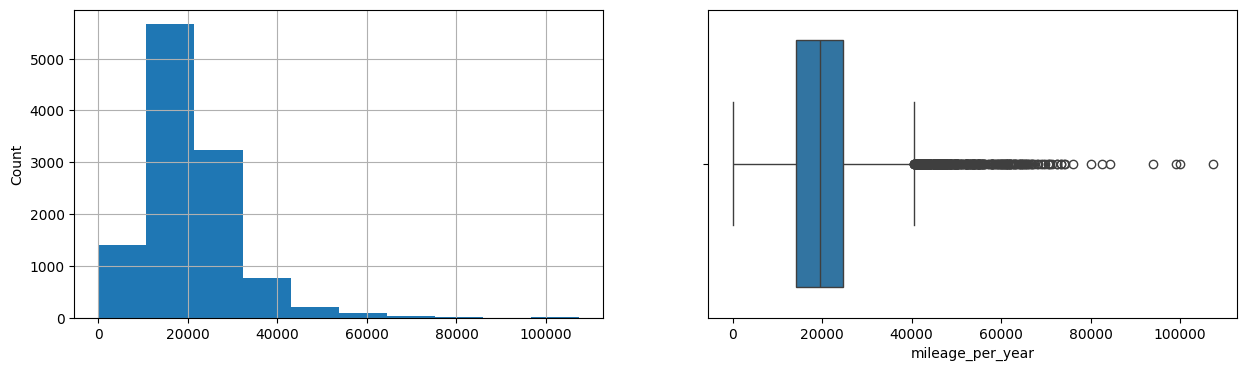

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    print(col)
    print('Skew value:', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=True)
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

From the visualizations (for skewness) we can see that most of the numerical columns are skewed to either left or right. That means that mostly the values are on one side, but there are also some (few number of) values on the other side (extreme values or outliers). "Model_group" is the only numerical column which basically has no skew and it is probably thanks to grouping "model" column based on average prices and this has helped to balance it.

In [54]:
# Display top 100 rows before log transformation of price
print("TOP 100 ROWS - BEFORE PRICE NORMALIZATION")
print("="*80)
print(df.head(100))

TOP 100 ROWS - BEFORE PRICE NORMALIZATION
             brand  first_reg       type  body_type          fuel   mileage  \
111          Honda       2006  passenger      sedan        diesel  356000.0   
112           Jeep       1997        suv    touring        diesel  350000.0   
113           Opel       2008  passenger    minivan  petrol + gas  213500.0   
114           Saab       2000  passenger    touring        petrol  294661.0   
115          Skoda       2006  passenger  hatchback        petrol  135500.0   
..             ...        ...        ...        ...           ...       ...   
213  Mercedes-Benz       2002        suv    touring        diesel  348490.0   
214           MINI       2003  passenger  hatchback        petrol  224147.0   
215           MINI       2002  passenger  hatchback        petrol  136000.0   
216           Opel       2010  passenger    touring        diesel  286000.0   
217        Renault       2007  passenger  hatchback        petrol   92994.0   

         

In [55]:
# we apply transformation to skewed num columns. Trying to transform data. These transformations compress
# the larger values and spread out the smaller values, making the distribution more symmetrical and closer to normal.

# Ensure all values are positive before log transformation
df.loc[df['mileage'] <= 0, 'mileage'] = 1
df['mileage'] = np.log(df['mileage'])

# Price should already be > 0 due to previous filtering
df['price'] = np.log(df['price'])

df.loc[df['engine_size'] <= 0, 'engine_size'] = 1
df['engine_size'] = np.log(df['engine_size'])

df.loc[df['power'] <= 0, 'power'] = 1
df['power'] = np.log(df['power'])

# Handle non-positive age values before log transformation
# Replacing age <= 0 with 1 to avoid issues with np.log(0) or np.log(negative)
df.loc[df['age'] <= 0, 'age'] = 1
df['age'] = np.log(df['age'])

# Handle non-positive age_mileage_interaction values before log transformation
df.loc[df['age_mileage_interaction'] <= 0, 'age_mileage_interaction'] = 1
df['age_mileage_interaction'] = np.log(df['age_mileage_interaction'])

# Handle non-positive mileage_per_year values before log transformation
df.loc[df['mileage_per_year'] <= 0, 'mileage_per_year'] = 1
df['mileage_per_year'] = np.log(df['mileage_per_year'])

first_reg
Skew value: -1.09


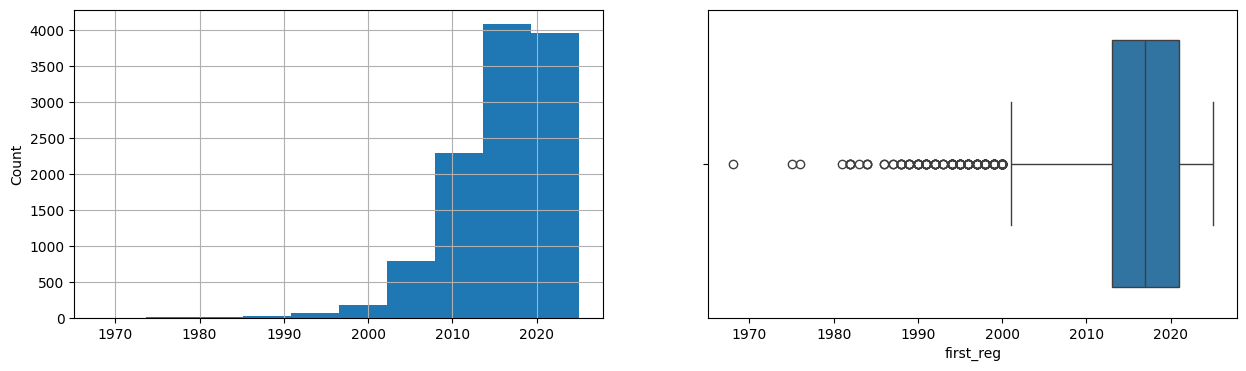

mileage
Skew value: -3.8


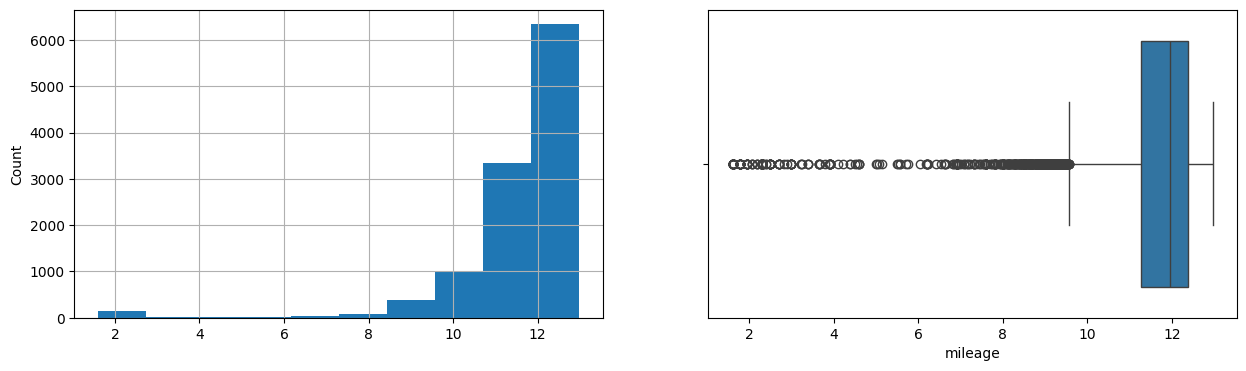

price
Skew value: -0.44


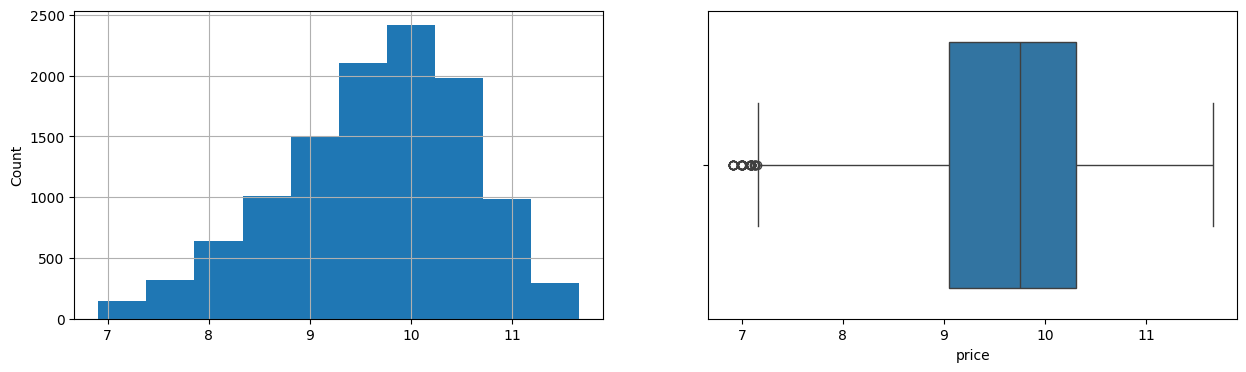

engine_size
Skew value: 3.81


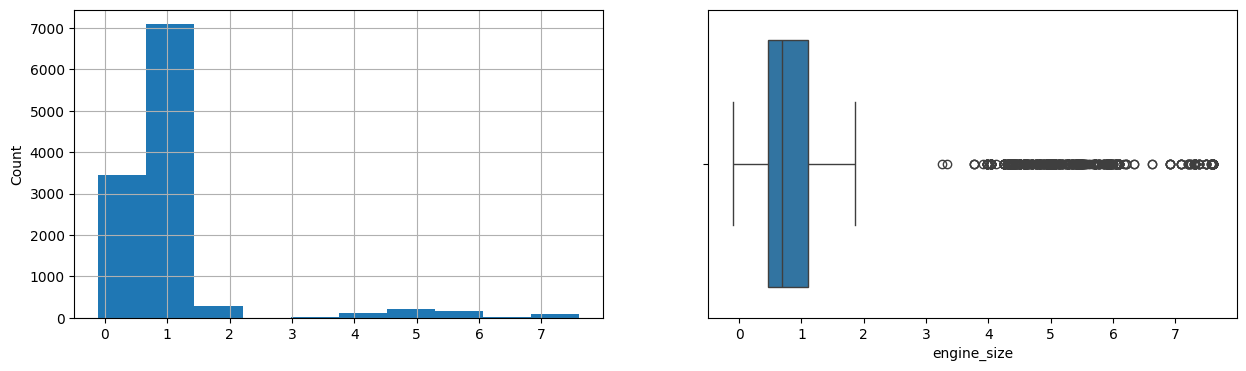

power
Skew value: 0.41


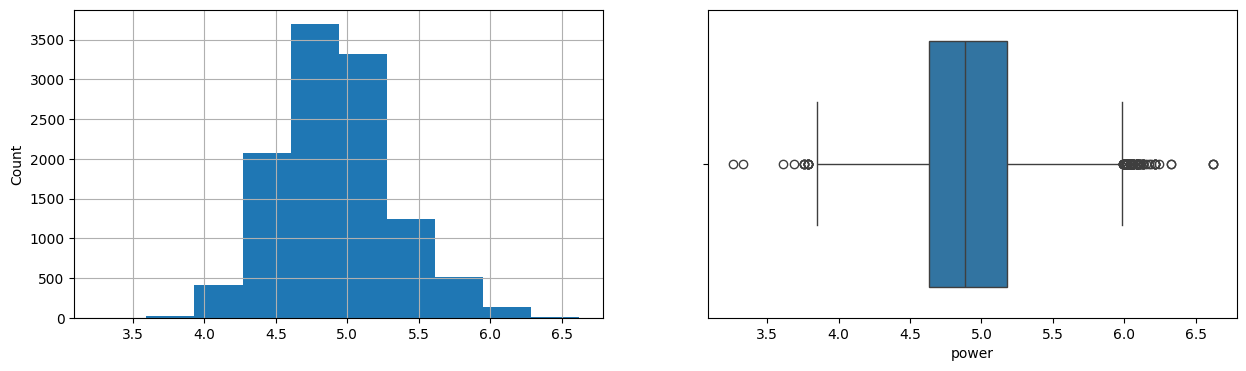

model_group
Skew value: 0.03


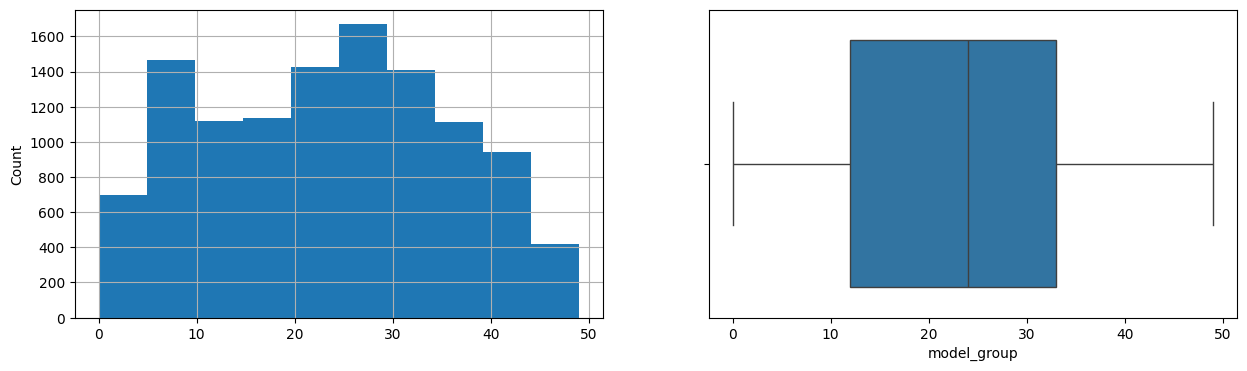

age
Skew value: -0.71


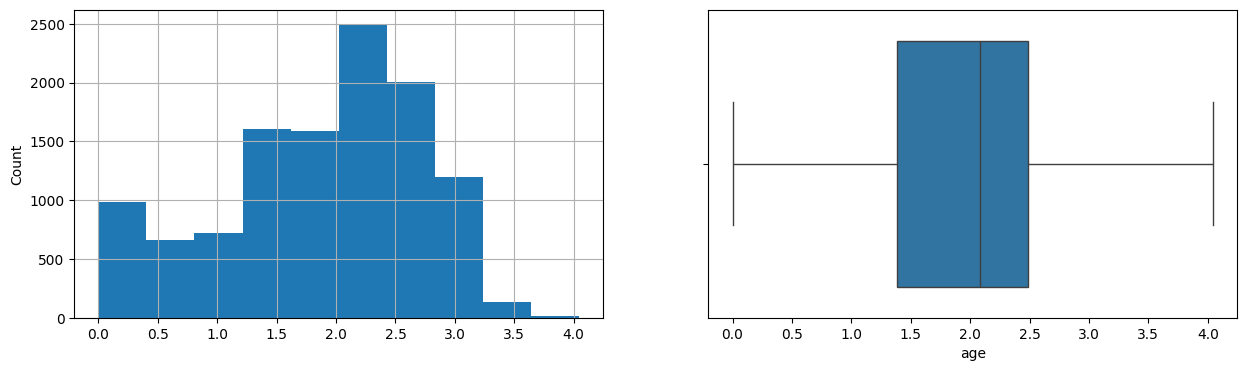

power_per_engine
Skew value: -0.07


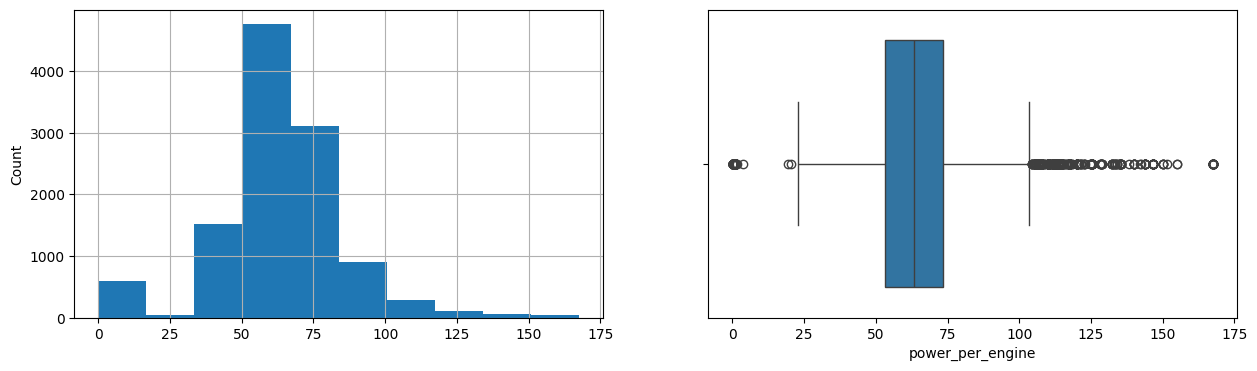

age_mileage_interaction
Skew value: -3.12


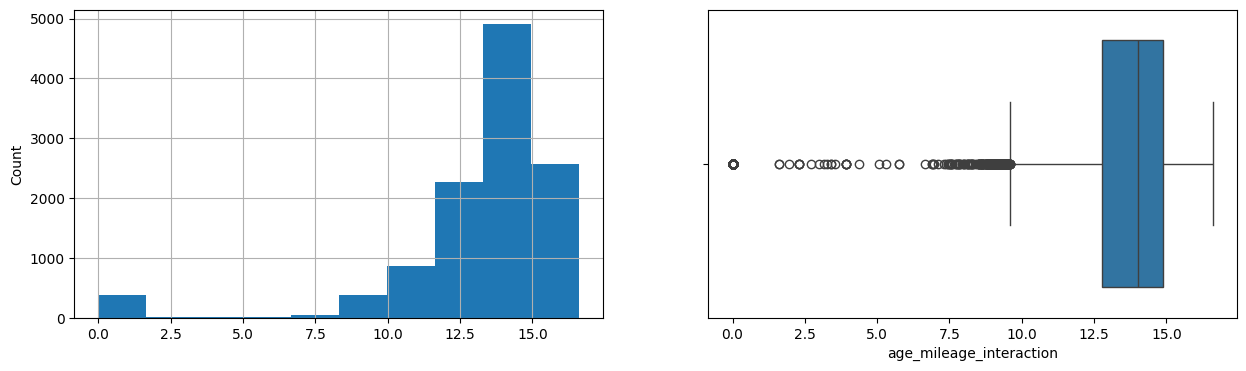

mileage_per_year
Skew value: -4.55


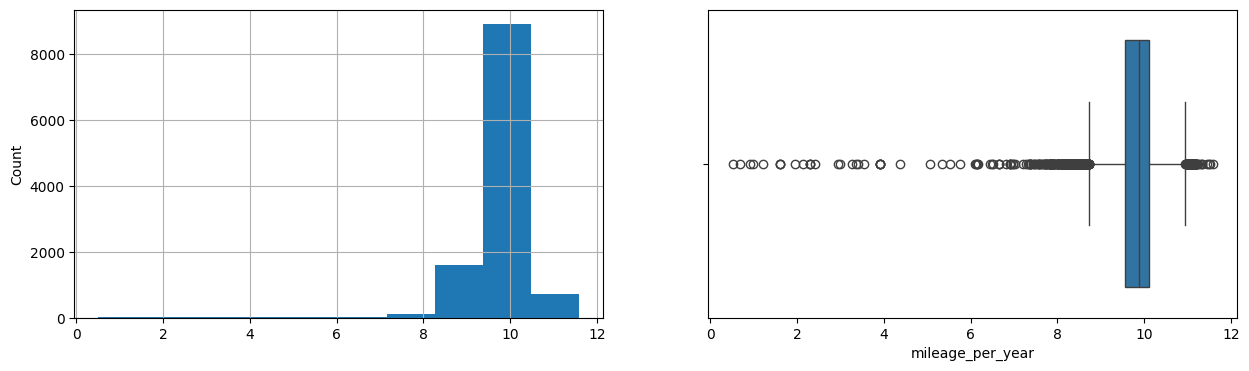

In [56]:
# Plotting num cols distributions again after log transformation. We see that there is lot less skewness now and columns are more balanced
for col in num_cols:
    print(col)
    print('Skew value:', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=True)
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

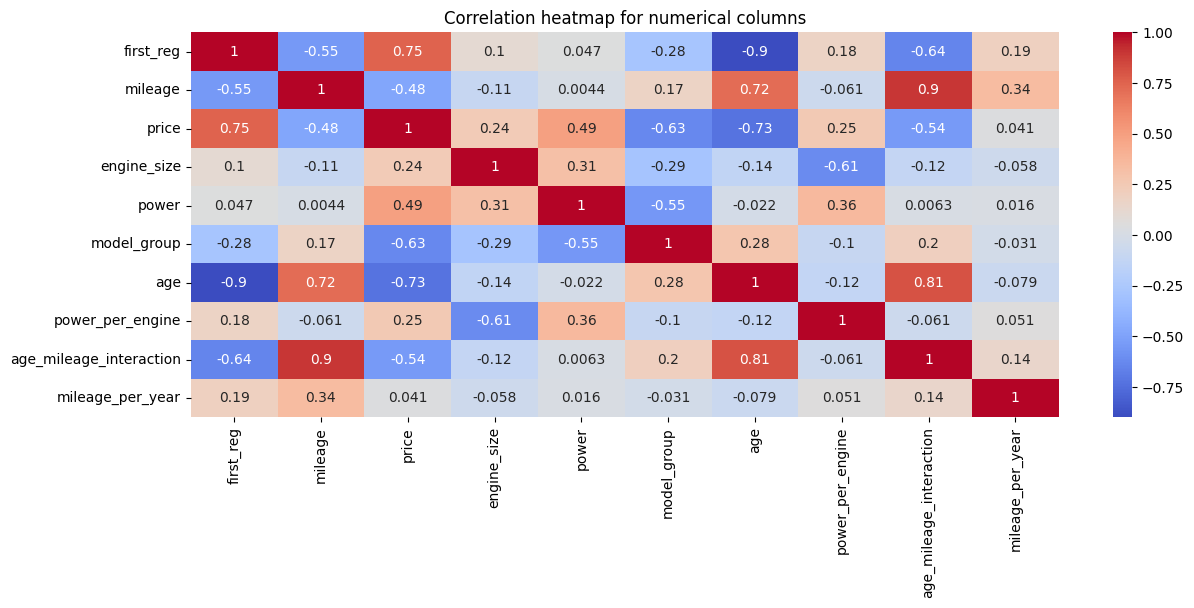

In [57]:
plt.figure(figsize=(14,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation heatmap for numerical columns")
plt.show()

Looking at this correlation heatmap we can do some pretty expected interpretations. For example, mileage and price are negatively correlated (when mileage increases, price decreases). Mileage and age have positive correlation (the higher the mileage, the older the car).

In [ ]:
for feature in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

From the distribution plots for categorical columns we can see that many columns have clear dominant values (like color and gearbox, for example). To transform categorical data, we will apply one-hot encoding later.

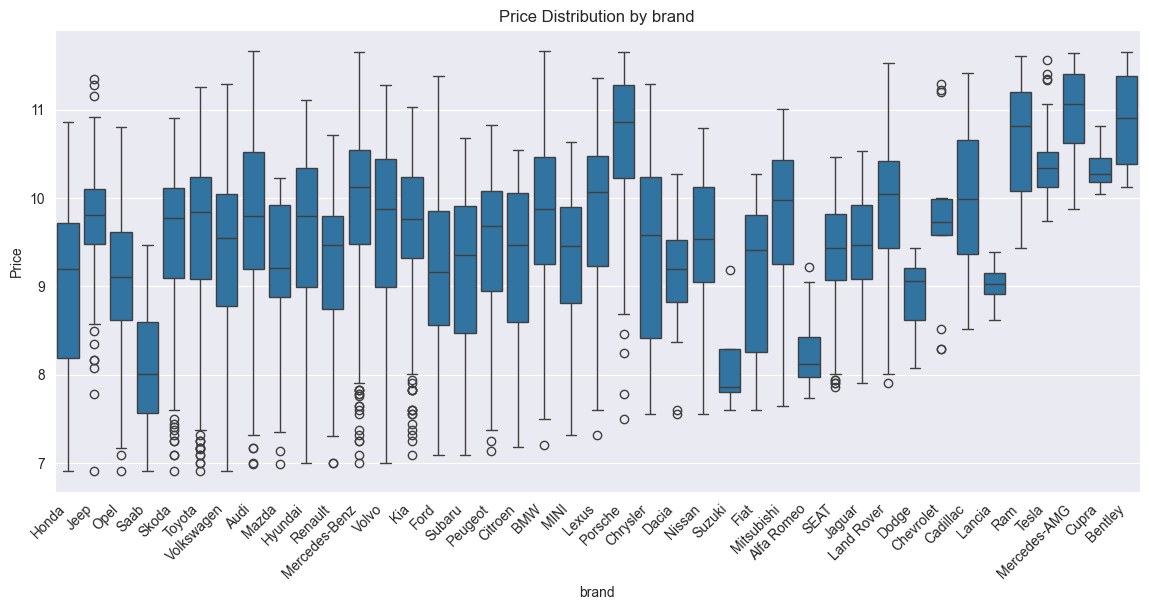

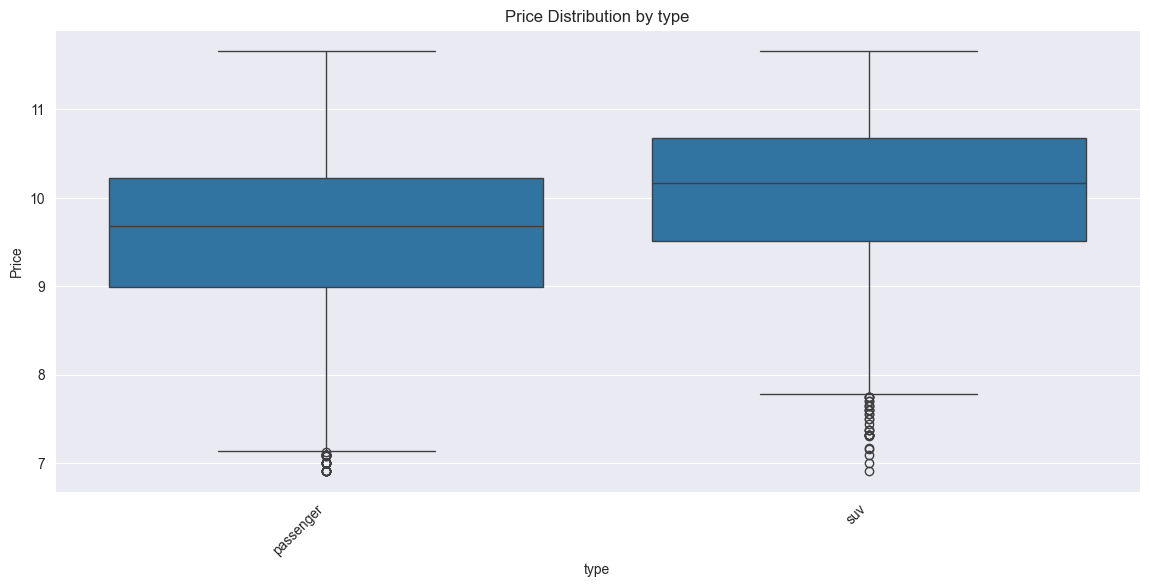

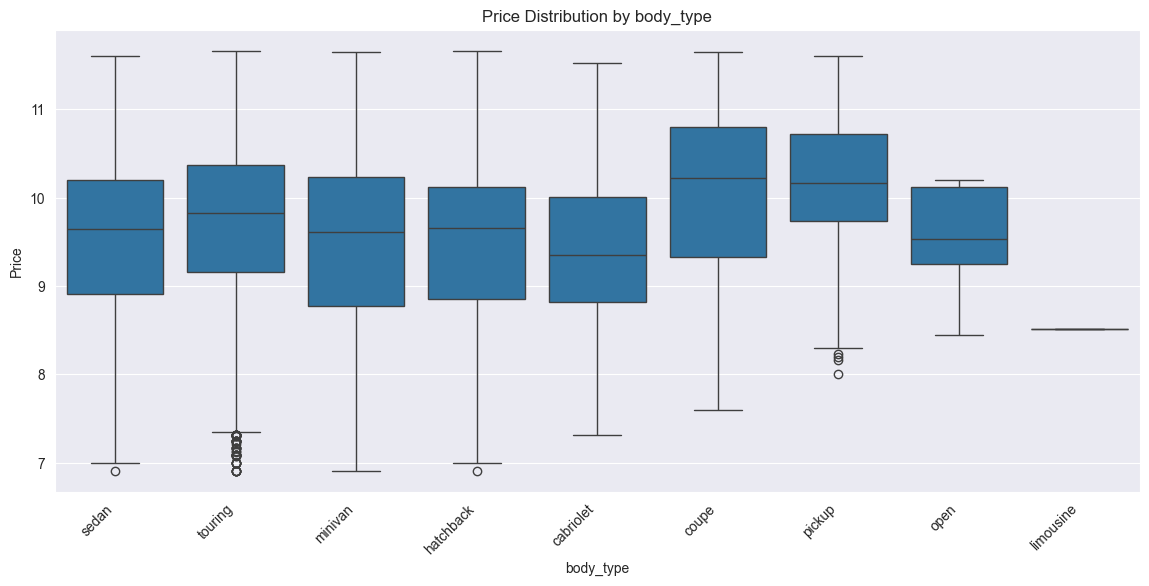

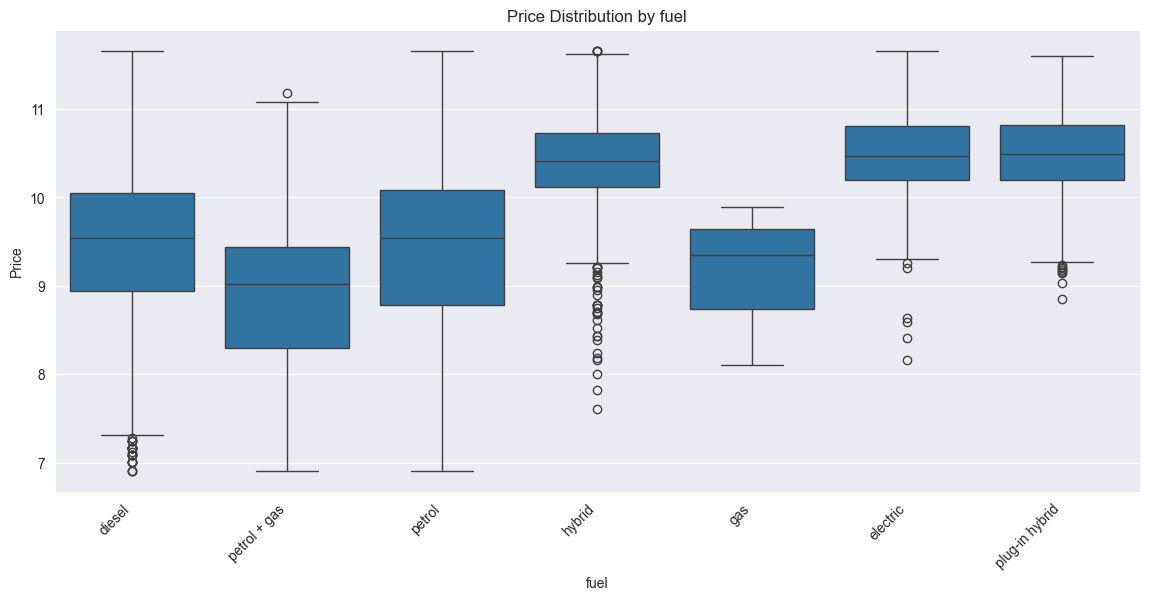

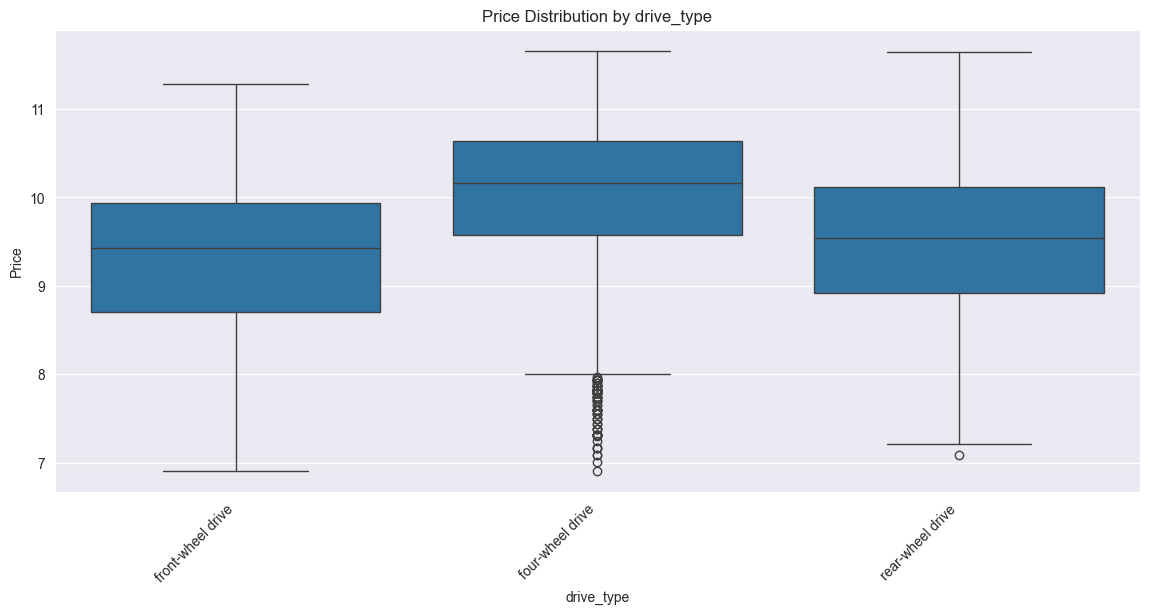

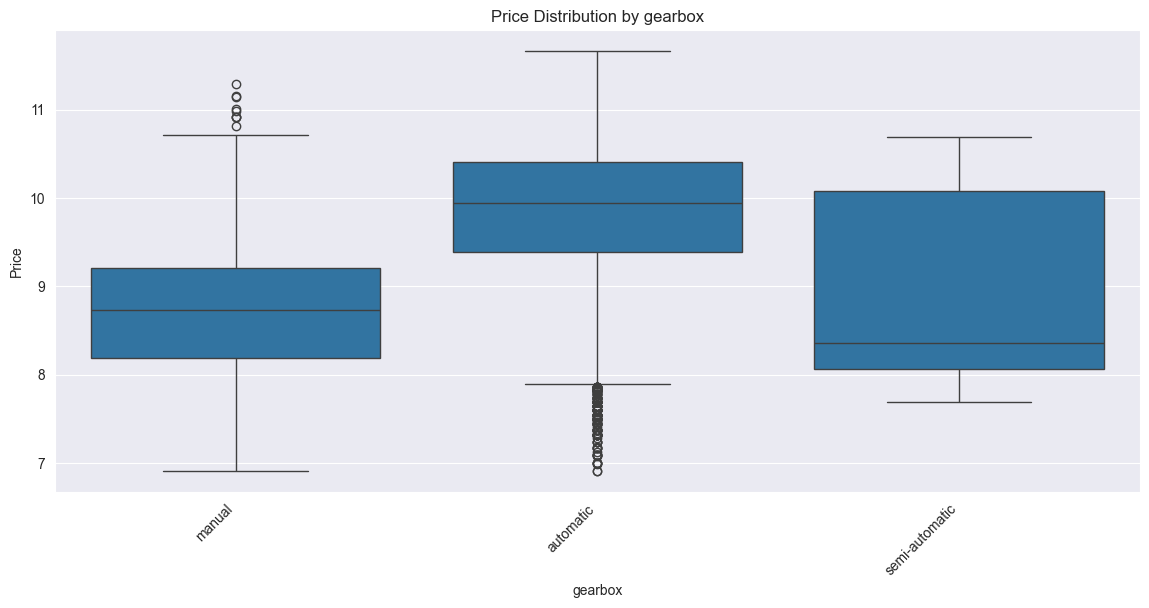

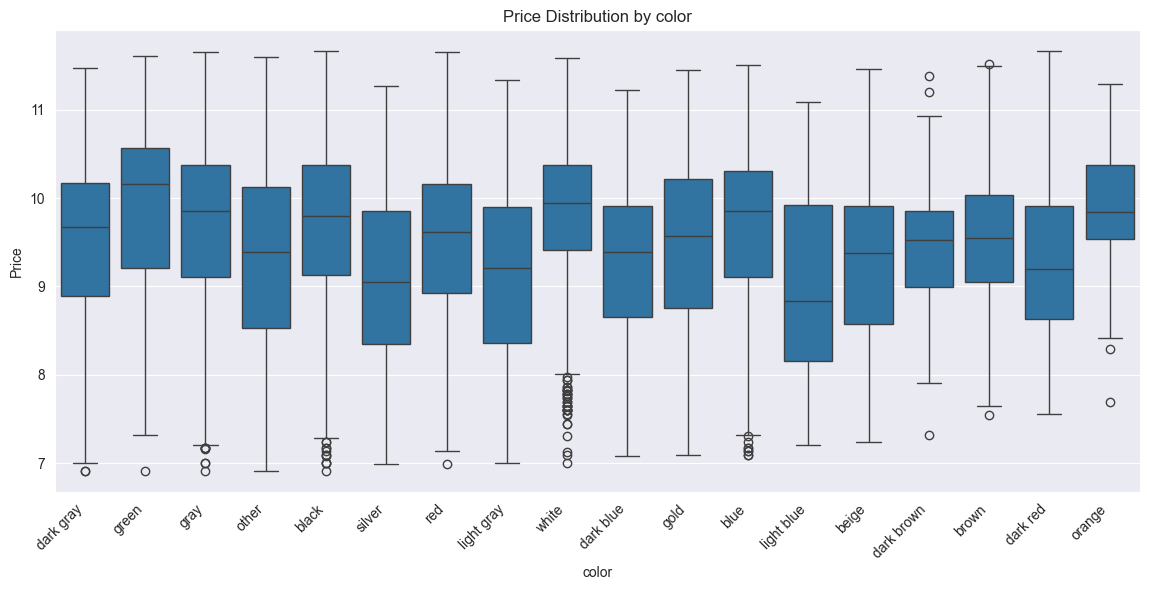

In [ ]:
for feature in cat_cols:
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df, x=feature, y='price')

    plt.title(f'Price Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
    plt.show()

We plot price distribution by each categorical column separately and see that many columns have quite a lot of outliers. Price here on the y-axis is logarithm of the price becuase we did log transformation earlier.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- 3. Separate target and features ---
y = df['price']
# Drop 'first_reg' because it's redundant with 'age' (age = current_year - first_reg)
# Keeping both creates multicollinearity which can distort feature importance
X = df.drop(columns=['price', 'first_reg'])

# --- 4. Identify categorical and numeric columns ---
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# --- 5. Scale numeric columns ---
scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# Invert mileage scale (so low mileage = 1, high mileage = 0)
if 'mileage' in X.columns:
    X['mileage'] = 1 - X['mileage']

# --- 6. One-hot encode categorical columns ---
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
# --- 7. Split into train and test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# --- 8. Train Linear Regression model ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# --- 9. Predict on test set ---
y_pred = lr_model.predict(X_test)

# --- Inverse transform y_test and y_pred back to original price scale ---
y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred)

# --- 10. Evaluate model ---
train_r2 = lr_model.score(X_train, y_train)
test_r2 = lr_model.score(X_test, y_test)

# Calculate MAE and RMSE on original price scale
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
median_price = np.median(y_test_original)

mae_pct = (mae / median_price) * 100
rmse_pct = (rmse / median_price) * 100


## As we did log transformation on our "price" value, we need to transform it back to original value to interpret it:

print(f"Training R² (log-transformed price): {train_r2:.3f}")
print(f"Test R² (log-transformed price): {test_r2:.3f}")
print(f"Median actual price: {median_price:,.2f} euros")
print(f"MAE: {mae:,.2f} euros ({mae_pct:.2f}%)")
print(f"RMSE: {rmse:,.2f} euros ({rmse_pct:.2f}%)")

Training R² (log-transformed price): 0.856
Test R² (log-transformed price): 0.854
Median actual price: 16,900.00 euros
MAE: 4,420.45 euros (26.16%)
RMSE: 7,656.22 euros (45.30%)


Test R squared is a bit higher than training one, so we could say that the model can generalize on test data. MAE could be better (that means, have a lower value), but this is the first model and we could improve data transformation too. For RMSE, this high value can be affected by outliers and we did not focus on outliers so far.

In [ ]:
lr_model.coef_

array([ 7.56436558e-01,  1.84169954e-02,  1.68205452e+00, -6.64853687e-01,
       -5.22862984e+00,  2.19207247e-01,  2.57612122e-01,  7.32482769e-01,
        3.93877070e-01,  9.76273935e-01, -4.11530438e-02, -8.21339212e-02,
       -6.07376819e-02,  2.34735430e-02, -2.14008199e-01,  1.00056085e-01,
        7.22150921e-02,  1.52859870e-01, -2.06820590e-02,  9.51384754e-02,
        2.72970085e-01,  7.85424191e-03,  2.03849747e-01,  3.07922800e-01,
        2.12912907e-01,  1.64158372e-01,  8.92797514e-02,  5.04259681e-01,
        3.60940461e-01,  4.38739275e-02,  3.13581010e-02, -1.91091051e-02,
        2.70100392e-02,  4.59544802e-01,  4.68988820e-03,  5.75094443e-02,
        7.96424110e-02,  2.03677200e-01,  9.70250103e-02,  7.71657643e-02,
       -7.81803188e-02, -2.73714129e-01,  1.89500585e-01,  2.21811581e-01,
        1.71378215e-01,  1.81121282e-02, -1.20568603e-01, -3.81132077e-01,
        1.04554143e+00, -2.89448636e-01,  7.13918008e-01, -2.33168205e-01,
       -3.85596865e-01, -

In [ ]:
df.head()

,brand,first_reg,type,body_type,fuel,mileage,drive_type,gearbox,color,price,engine_size,power,model_group,age
111,Honda,2006,passenger,sedan,diesel,12.782686,front-wheel drive,manual,dark gray,6.907755,0.788457,4.634729,48,19
112,Jeep,1997,suv,touring,diesel,12.765688,four-wheel drive,manual,green,6.907755,0.916291,4.442651,35,28
113,Opel,2008,passenger,minivan,petrol + gas,12.271392,front-wheel drive,manual,gray,6.907755,0.470004,4.234107,38,17
114,Saab,2000,passenger,touring,petrol,12.593581,front-wheel drive,automatic,other,6.907755,1.098612,4.990433,49,25
115,Skoda,2006,passenger,hatchback,petrol,11.816727,front-wheel drive,manual,other,6.907755,0.182322,3.850148,41,19


Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,          # Limit depth to prevent overfitting
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Inverse transform back to original prices
y_pred_train_rf_original = np.exp(y_pred_train_rf)
y_pred_test_rf_original = np.exp(y_pred_test_rf)

train_r2_rf = rf_model.score(X_train, y_train)
test_r2_rf = rf_model.score(X_test, y_test)

mae_rf = mean_absolute_error(y_test_original, y_pred_test_rf_original)
rmse_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_test_rf_original))
median_price_rf = np.median(y_test_original)

mae_pct_rf = (mae_rf / median_price_rf) * 100
rmse_pct_rf = (rmse_rf / median_price_rf) * 100

print(f"\nTraining R² (log-transformed price): {train_r2_rf:.3f}")
print(f"Test R² (log-transformed price): {test_r2_rf:.3f}")
print(f"Median actual price: {median_price_rf:,.2f} euros")
print(f"MAE: {mae_rf:,.2f} euros ({mae_pct_rf:.2f}%)")
print(f"RMSE: {rmse_rf:,.2f} euros ({rmse_pct_rf:.2f}%)")

print("TOP 15 MOST IMPORTANT FEATURES (Random Forest)")

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

print(feature_importance.to_string(index=False))


Training R² (log-transformed price): 0.986
Test R² (log-transformed price): 0.934
Median actual price: 16,900.00 euros
MAE: 2,947.42 euros (17.44%)
RMSE: 5,107.77 euros (30.22%)
TOP 15 MOST IMPORTANT FEATURES (Random Forest)
                     feature  importance
                         age    0.601896
                       power    0.207163
                 model_group    0.068118
                     mileage    0.048771
drive_type_front-wheel drive    0.016852
                 engine_size    0.015924
              gearbox_manual    0.005384
                 fuel_petrol    0.001868
                  brand_Audi    0.001860
            brand_Volkswagen    0.001574
           body_type_minivan    0.001378
           body_type_touring    0.001359
             body_type_sedan    0.001250
                 color_black    0.001156
                  color_gray    0.001142


Now let's compare results with Linear Regression model's output

In [ ]:
print("MODEL COMPARISON")


comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Train R²': [train_r2, train_r2_rf],
    'Test R²': [test_r2, test_r2_rf],
    'MAE (€)': [mae, mae_rf],
    'RMSE (€)': [rmse, rmse_rf],
    'MAE (%)': [mae_pct, mae_pct_rf],
    'RMSE (%)': [rmse_pct, rmse_pct_rf]
})

print(comparison.to_string(index=False))

MODEL COMPARISON
            Model  Train R²  Test R²     MAE (€)    RMSE (€)   MAE (%)  RMSE (%)
Linear Regression  0.856317 0.854440 4420.454562 7656.220617 26.156536 45.303081
    Random Forest  0.985592 0.934058 2947.420677 5107.766935 17.440359 30.223473


XGBoost Model

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

# Inverse transform back to original prices
y_pred_train_xgb_original = np.exp(y_pred_train_xgb)
y_pred_test_xgb_original = np.exp(y_pred_test_xgb)

train_r2_xgb = xgb_model.score(X_train, y_train)
test_r2_xgb = xgb_model.score(X_test, y_test)

mae_xgb = mean_absolute_error(y_test_original, y_pred_test_xgb_original)
rmse_xgb = np.sqrt(mean_squared_error(y_test_original, y_pred_test_xgb_original))
median_price_xgb = np.median(y_test_original)

mae_pct_xgb = (mae_xgb / median_price_xgb) * 100
rmse_pct_xgb = (rmse_xgb / median_price_xgb) * 100

print(f"\nTraining R² (log-transformed price): {train_r2_xgb:.3f}")
print(f"Test R² (log-transformed price): {test_r2_xgb:.3f}")
print(f"Median actual price: {median_price_xgb:,.2f} euros")
print(f"MAE: {mae_xgb:,.2f} euros ({mae_pct_xgb:.2f}%)")
print(f"RMSE: {rmse_xgb:,.2f} euros ({rmse_pct_xgb:.2f}%)")

print("TOP 15 MOST IMPORTANT FEATURES (XGBoost)")

feature_importance_xgb = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

print(feature_importance_xgb.to_string(index=False))


Training R² (log-transformed price): 0.963
Test R² (log-transformed price): 0.939
Median actual price: 16,900.00 euros
MAE: 2,888.03 euros (17.09%)
RMSE: 4,809.58 euros (28.46%)
TOP 15 MOST IMPORTANT FEATURES (XGBoost)
                     feature  importance
                         age    0.303380
drive_type_front-wheel drive    0.131163
                       power    0.092246
                 model_group    0.053090
              gearbox_manual    0.031256
              body_type_open    0.023274
               fuel_electric    0.019279
            brand_Land Rover    0.016271
             body_type_coupe    0.016220
               brand_Hyundai    0.016163
                     mileage    0.015978
                 brand_Tesla    0.014518
                 engine_size    0.014456
                   brand_Kia    0.012026
                 fuel_petrol    0.011805


XGBoost Hyperparameter Tuning with Cross-Validation

We'll use GridSearchCV to find the optimal hyperparameters for XGBoost by testing different combinations of:
- n_estimators: Number of boosting rounds
- max_depth: Maximum tree depth
- learning_rate: Step size shrinkage
- min_child_weight: Minimum sum of instance weight needed in a child
- subsample: Fraction of samples used for fitting trees
- colsample_bytree: Fraction of features used for fitting trees

Final Model Comparison (All Three Models)

In [ ]:
print("="*70)
print("FINAL MODEL COMPARISON - ALL MODELS")
print("="*70)

comparison_all_final = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost (Default)',],
    'Train R²': [train_r2, train_r2_rf, train_r2_xgb, ],
    'Test R²': [test_r2, test_r2_rf, test_r2_xgb, ],
    'MAE (€)': [mae, mae_rf, mae_xgb, ],
    'RMSE (€)': [rmse, rmse_rf, rmse_xgb, ],
    'MAE (%)': [mae_pct, mae_pct_rf, mae_pct_xgb, ],
    'RMSE (%)': [rmse_pct, rmse_pct_rf, rmse_pct_xgb, ]
})

print(comparison_all_final.to_string(index=False))

# Find best model based on Test R²
best_model_idx = comparison_all_final['Test R²'].idxmax()
best_model_name = comparison_all_final.loc[best_model_idx, 'Model']
best_test_r2 = comparison_all_final.loc[best_model_idx, 'Test R²']
best_mae = comparison_all_final.loc[best_model_idx, 'MAE (€)']
best_rmse = comparison_all_final.loc[best_model_idx, 'RMSE (€)']

print("\n" + "="*70)
print(f"BEST MODEL: {best_model_name}")
print("="*70)
print(f"Test R²: {best_test_r2:.3f}")
print(f"MAE: {best_mae:,.2f} euros ({comparison_all_final.loc[best_model_idx, 'MAE (%)']:.2f}%)")
print(f"RMSE: {best_rmse:,.2f} euros ({comparison_all_final.loc[best_model_idx, 'RMSE (%)']:.2f}%)")
print("="*70)

FINAL MODEL COMPARISON - ALL MODELS
            Model  Train R²  Test R²     MAE (€)    RMSE (€)   MAE (%)  RMSE (%)
Linear Regression  0.856317 0.854440 4420.454562 7656.220617 26.156536 45.303081
    Random Forest  0.985592 0.934058 2947.420677 5107.766935 17.440359 30.223473
XGBoost (Default)  0.963282 0.938877 2888.029051 4809.578865 17.088929 28.459047
  XGBoost (Tuned)  0.983746 0.943866 2634.692629 4349.545120 15.589897 25.736953

BEST MODEL: XGBoost (Tuned)
Test R²: 0.944
MAE: 2,634.69 euros (15.59%)
RMSE: 4,349.55 euros (25.74%)


In [ ]:
# from sklearn.model_selection import GridSearchCV
# import time

# print("Starting hyperparameter tuning with GridSearchCV...")
# print("This may take several minutes...\n")

# # Define parameter grid to search
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [4, 6, 8],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Initialize XGBoost model
# xgb_base = XGBRegressor(random_state=42, n_jobs=-1)

# # Setup GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(
#     estimator=xgb_base,
#     param_grid=param_grid,
#     cv=5,
#     scoring='r2',
#     verbose=1,
#     n_jobs=-1
# )

# # Start timing
# start_time = time.time()

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # End timing
# end_time = time.time()
# elapsed_time = end_time - start_time

# print(f"\nGrid Search completed in {elapsed_time:.2f} seconds ({elapsed_time/60:.2f} minutes)")
# print(f"\nBest parameters found:")
# for param, value in grid_search.best_params_.items():
#     print(f"  {param}: {value}")
# print(f"\nBest cross-validation R² score: {grid_search.best_score_:.4f}")

Starting hyperparameter tuning with GridSearchCV...
This may take several minutes...

Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Grid Search completed in 78.00 seconds (1.30 minutes)

Best parameters found:
  colsample_bytree: 0.8
  learning_rate: 0.05
  max_depth: 8
  min_child_weight: 5
  n_estimators: 300
  subsample: 0.8

Best cross-validation R² score: 0.9412


In [ ]:
print("TOP 15 MOST IMPORTANT FEATURES (Tuned XGBoost)")

feature_importance_xgb_best = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_best.feature_importances_
}).sort_values('importance', ascending=False).head(15)

print(feature_importance_xgb_best.to_string(index=False))

TOP 15 MOST IMPORTANT FEATURES (Tuned XGBoost)
                     feature  importance
                         age    0.228241
drive_type_front-wheel drive    0.136219
                       power    0.062794
                 model_group    0.045630
              gearbox_manual    0.033443
                     mileage    0.023367
              body_type_open    0.020445
            brand_Land Rover    0.020080
                 fuel_hybrid    0.015673
                 engine_size    0.015430
               fuel_electric    0.015414
                 fuel_petrol    0.012956
                brand_Subaru    0.012865
               brand_Hyundai    0.012758
                  brand_Opel    0.012189


Feature Importance Investigation

Let's investigate why `drive_type_front-wheel drive` has such high importance. We'll check for:
1. Multicollinearity between features (especially `age` and `first_reg`)
2. The relationship between drive_type and price
3. Correlations in the training data

In [ ]:
# Check correlation between age and first_reg in the ORIGINAL data (before scaling)
# We need to look at the original df before transformations

print("MULTICOLLINEARITY CHECK")
print("="*70)

# Check if age and first_reg are redundant
# Since we don't have access to pre-scaled data in X_train, let's check the correlation
# by looking at feature importance - both age and first_reg are in top 3

print("\nProblem 1: Age and first_reg are highly correlated")
print("  - 'age' is calculated as: current_year - first_reg")
print("  - Having both features creates multicollinearity")
print("  - This can inflate the importance of other features")
print("\nSolution: Remove one of these features (keep 'age', drop 'first_reg')")

# Check correlation in the training set
correlation_matrix = pd.DataFrame(X_train, columns=X_train.columns).corr()

# Find features highly correlated with drive_type_front-wheel drive
drive_type_corr = correlation_matrix['drive_type_front-wheel drive'].abs().sort_values(ascending=False)
print("\n" + "="*70)
print("CORRELATIONS WITH 'drive_type_front-wheel drive':")
print("="*70)
print(drive_type_corr.head(10).to_string())

MULTICOLLINEARITY CHECK

Problem 1: Age and first_reg are highly correlated
  - 'age' is calculated as: current_year - first_reg
  - Having both features creates multicollinearity
  - This can inflate the importance of other features

Solution: Remove one of these features (keep 'age', drop 'first_reg')

CORRELATIONS WITH 'drive_type_front-wheel drive':
drive_type_front-wheel drive    1.000000
power                           0.659909
model_group                     0.520322
brand_BMW                       0.332899
type_suv                        0.324484
gearbox_manual                  0.321028
drive_type_rear-wheel drive     0.311043
body_type_hatchback             0.299118
engine_size                     0.241876
brand_Mercedes-Benz             0.240797
